## Project Name: Raisins the bar

### Introduction:

- Background information:

Raisins are dried grapes. Raisins can be dried in the sun or they can be dried using a mechanical process.[1] As with any kind of fruit, there are different types of raisins. There are different factors that are used to help determine the type of raisin. 

- Predictive question that we will focus on:

__By fixing Eccentricity (a numerical variable in the dataset) and combing it with one of the other numerical variables existed in the dataset, we will compare all those different combinations’ matching accuracy (between the predicted raisin type and the real raisin type).  And what we want to finally reach is that which of the other numerical variables can provide us with the most reliable predictions on raisin type when that is combined with the fixed Eccentricity variable.__

- Information about the dataset:

The dataset that our group has chosen to work on is the raisin dataset provided by the UCI Machine Learning Repository.
This dataset has seven numerical predictors (Area, Major Axis Length, Minor Axis Length, Eccentricity, Convex Area, Extent and Perimeter). The descriptions and definitions of these variables are below. There is a single categorical predictor - the class, otherwise known as the type of raisin. Based on the numerical
values of the non-categorical predictor, we can predict the class or the type of raisin. In this dataset, there are two
classes of raisins: Kecimen and Besni.

These are the variables in the dataset. The first seven predictors are numerical and the last predictor is a character. 
1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: The two types of raisin: Kecimen and Besni raisin.

In [9]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
options(repr.plot.width = 10, repr.plot.height = 6)

In [3]:
set.seed(2535) 
url <- "https://drive.google.com/uc?export=download&id=11KyK-H_2aP1I4FYR1aAC0wE4JB9BbAqz"
download.file(url, "raisin.xlsx")
raisin <- read_excel("raisin.xlsx")
raisin

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen
42492,310.1461,176.1314,0.8230987,43904,0.6658936,823.796,Kecimen
60952,332.4555,235.4298,0.7060575,62329,0.7435982,933.366,Kecimen
42256,323.1896,172.5759,0.8454988,44743,0.6980309,849.728,Kecimen


In [4]:
# This is where we clean and wrangle our data
# There is really not too much to do since this dataset is already very tidy
raisin <- raisin |>
    mutate(Class = as_factor(Class)) |>
    filter(!is.na(Area),
           !is.na(MajorAxisLength),
           !is.na(MinorAxisLength),
           !is.na(Eccentricity),
           !is.na(ConvexArea),
           !is.na(Extent),
           !is.na(Perimeter))
raisin

Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
45928,286.5406,208.7600,0.6849892,47336,0.6995994,844.162,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
49242,318.1254,200.1221,0.7773513,51368,0.6584564,881.836,Kecimen
42492,310.1461,176.1314,0.8230987,43904,0.6658936,823.796,Kecimen
60952,332.4555,235.4298,0.7060575,62329,0.7435982,933.366,Kecimen
42256,323.1896,172.5759,0.8454988,44743,0.6980309,849.728,Kecimen


In [5]:
# Here we are going to separate our data into training set and test test
raisin_split <- initial_split(raisin, prop = 0.7, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)

In [6]:
# Summarization of data
table_1 <- raisin_train |>
    group_by(Class) |>
    summarize(n = n())
table_1                                               # Number of observations in each class

table_2 <- raisin_train |>
    group_by(Class) |>
    summarize(ave_area = mean(Area),
              ave_major_al = mean(MajorAxisLength),
              ave_minor_al = mean(MinorAxisLength),
              ave_ecc = mean(Eccentricity),
              ave_convex = mean(ConvexArea),
              ave_extent = mean(Perimeter))
table_2                                               # Mean for each variable for each class

table_3 <- raisin_train |>
    select(Area: Perimeter) |>
    map_df(mean)
table_3                                               # Mean for each variable for the entire dataset

Class,n
<fct>,<int>
Kecimen,315
Besni,315


Class,ave_area,ave_major_al,ave_minor_al,ave_ecc,ave_convex,ave_extent
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Kecimen,62566.73,351.3758,227.5188,0.7448814,64810.41,978.3173
Besni,111194.43,505.7713,279.3095,0.8184891,115884.52,1343.4734


Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
86880.58,428.5736,253.4141,0.7816852,90347.47,0.6998016,1160.895


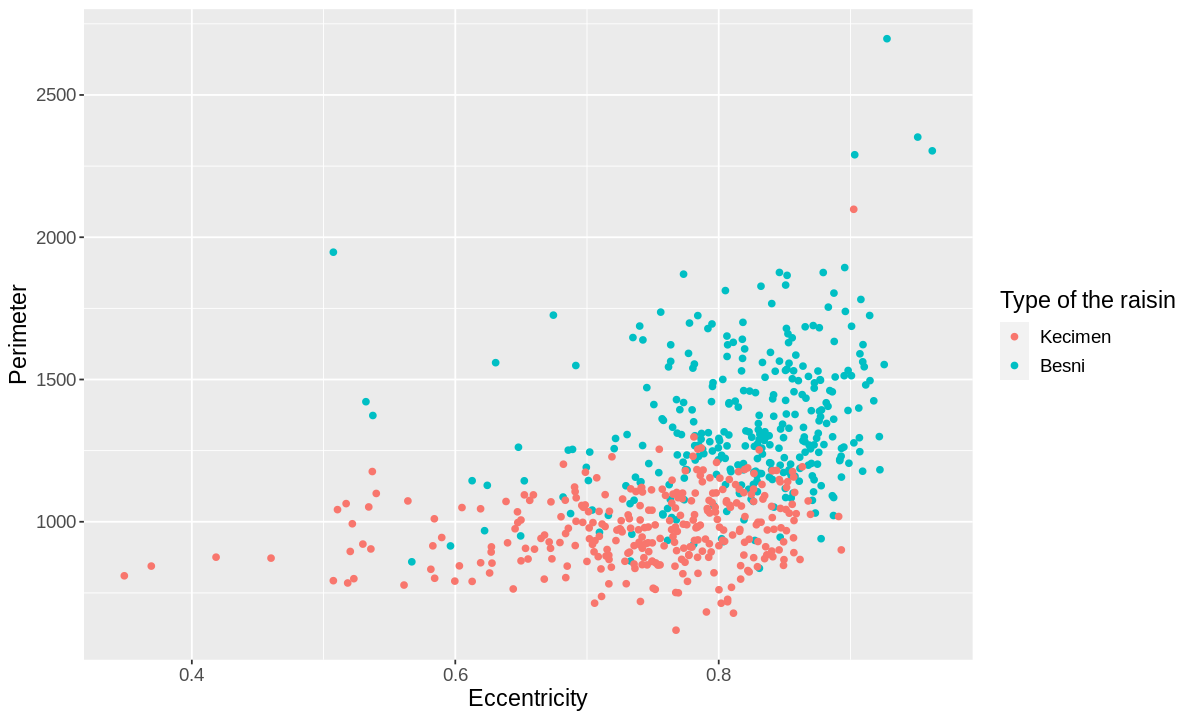

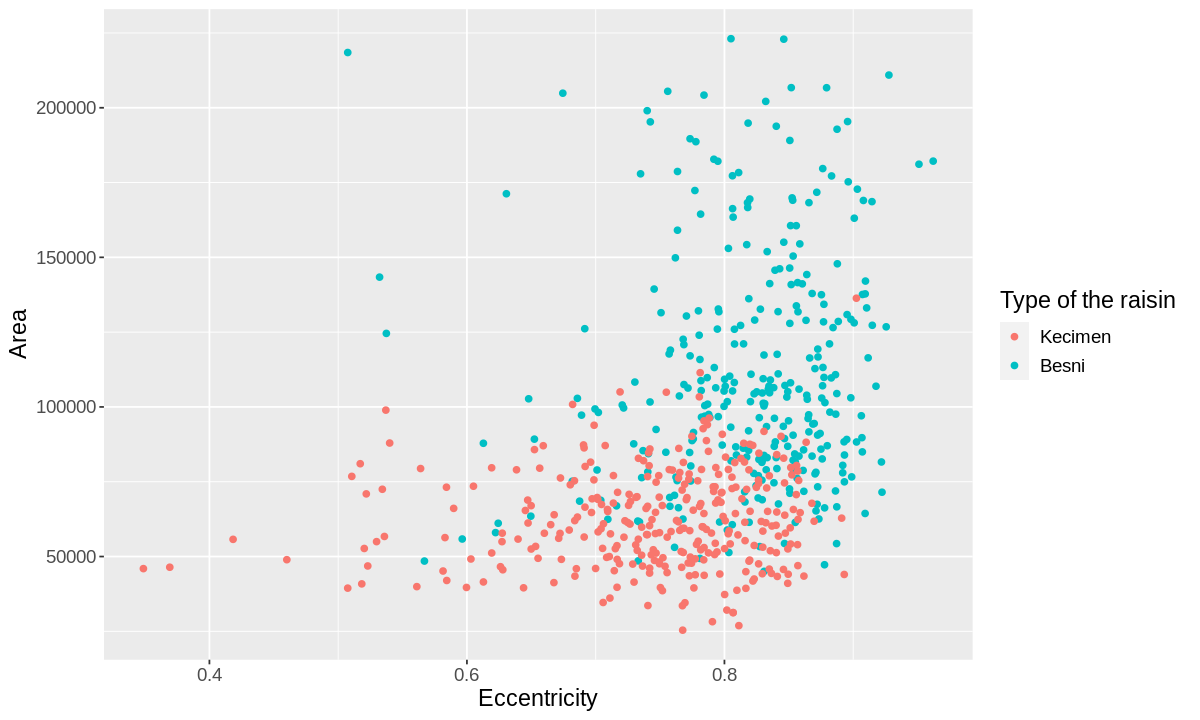

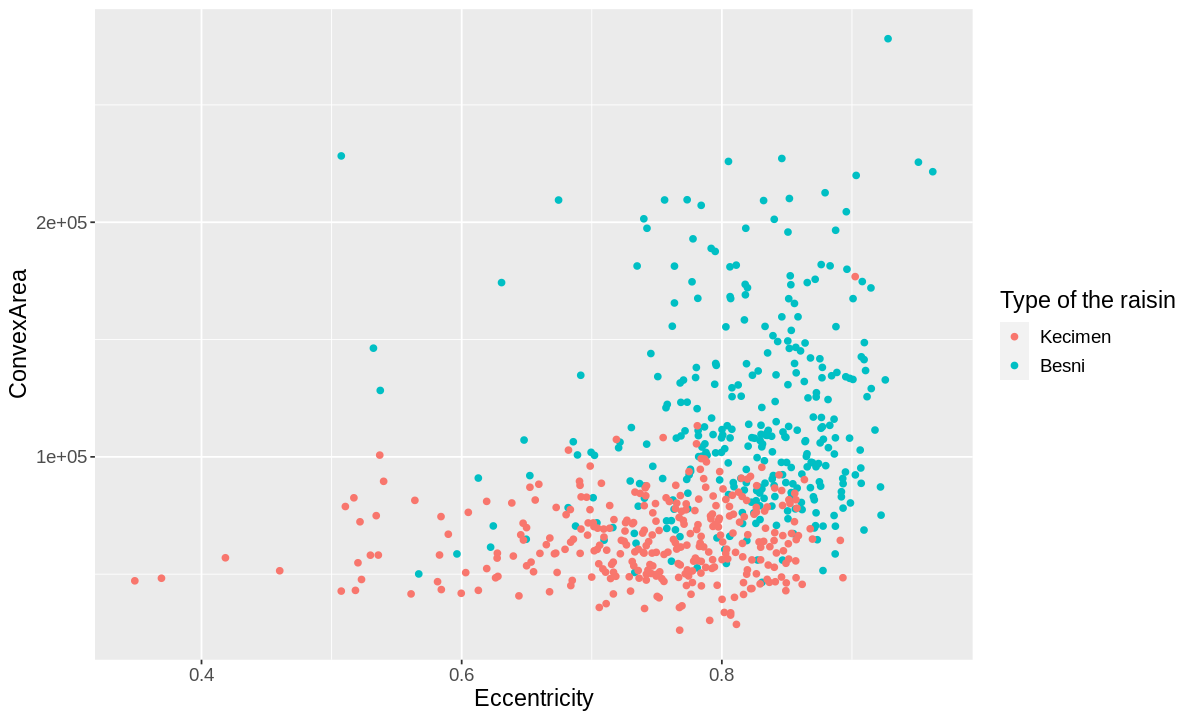

In [8]:
# Visualization of data
raisin_plot_1 <- raisin_train |>
    ggplot(aes(x = Eccentricity, y = Perimeter, color = Class)) +
    geom_point() +
    labs(x = "Eccentricity", y = "Perimeter", color = "Type of the raisin") +
    theme(text = element_text(size = 14))
raisin_plot_1    # how the relationship between predictor "Eccentricity" and predictor "Perimeter" determine the type of the raisin

raisin_plot_2 <- raisin_train |>
    ggplot(aes(x = Eccentricity, y = Area, color = Class)) +
    geom_point() +
    labs(x = "Eccentricity", y = "Area", color = "Type of the raisin") +
    theme(text = element_text(size = 14))
raisin_plot_2    # how the relationship between predictor "Eccentricity" and predictor "Area" determine the type of the raisin

raisin_plot_3 <- raisin_train |>
    ggplot(aes(x = Eccentricity, y = ConvexArea, color = Class)) +
    geom_point() +
    labs(x = "Eccentricity", y = "ConvexArea", color = "Type of the raisin") +
    theme(text = element_text(size = 14))
raisin_plot_3    # how the relationship between predictor "Eccentricity" and predictor "ConvexArea" determine the type of the raisin

- The above three scatter plots represent three different combinations (between 3 different variables with fixed variable Eccentricity)
- There are in total 6 different combinations since we have 6 more different variables other than Eccentricity
- We are only showing three combinations above as examples 

### Methodology: 

After wrangling and tidying the data, we have decided to keep the the eccentricity as the fixed variable in our dataset. This will be compared to the other alternating variables such as Area, Perimeter, Major axis length, Minor axis length, Convex area and Extent. We perform this in order to determine which one of these variables affect the class or type of the raisin to the largest extent.

In order to visualize these correlations, we will be using scatter plots to plot each alternating variable on the y axis versus eccentricity on the x axis. Eccentricity is our fixed variable. Once we have all our data visualized, we will use the K nearest neighbours method to implement our data classification and determine which one out of the 7 variables affects the class of raisin to the greatest extent.

### Expected outcomes and significance:


- What do we expect to find?  

We expect to find which variables out of Area, Major Axis Length, Minor Axis Length, Eccentricity, Convex Area, Extent and Perimeter have the greatest effect on predicting the class of raisin(Kecimen and Besni), or even if these variables have any effect on the prediction at all. 



- What impact could such findings have?

The analysis of this dataset will help us predict which variables have an impact on the class of the raisin. In the future, if someone decides to conduct another study on raisins, but they do not have the scope to research and collect data for seven numerical predictors, they can use our analysis to decide which predictors have the greatest impact on predicting the raisins and then they can research and compile data only on those variables instead. 


- What future questions could this lead to?

The future questions this could lead to are why these variables in particular have a more profound impact on the type of raisin. Also if any other variables are not in this dataset but also play a role in anticipating the class of the raisin and if there are different classes/types of raisins which can be predicted by these variables.  

### Sources and Citations:

[1] Filippone, Peggy Trowbridge. “What Is a Raisin?” The Spruce Eats, The Spruce Eats, 29 Sept. 2022, https://www.thespruceeats.com/raisin-storage-and-selection-1807799. 